<a href="https://colab.research.google.com/github/vedmara/project/blob/main/Assignment_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BACKGROUND:

The data is a marketing campaign data of a skin care clinic associated with its success.

Description of variables-

          Success: Response to marketing campaign of Skin Care Clinic which offers both products and services. (1: email Opened, 0: email not opened)

          AGE: Age Group of Customer

          Recency_Service: Number of days since last service purchase

          Recency_Product: Number of days since last product purchase

          Bill_Service: Total bill amount for service in last 3 months

          Bill_Product: Total bill amount for products in last 3 months

          Gender (1: Male, 2: Female)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
#BLR
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#NB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score
#svm
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Springboard_Python/Email Campaign.csv")
data.head()

,SN,Gender,AGE,Recency_Service,Recency_Product,Bill_Service,Bill_Product,Success
0,1,1,<=45,12,11,11.82,2.68,0
1,2,2,<=30,6,0,10.31,1.32,0
2,3,1,<=30,1,9,7.43,0.49,0
3,4,1,<=45,2,14,13.68,1.85,0
4,5,2,<=30,0,11,4.56,1.01,1


**Data Description**

In [ ]:
data[['Gender', 'Success']] = data[['Gender', 'Success']].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   SN               683 non-null    int64   
 1   Gender           683 non-null    category
 2   AGE              683 non-null    object  
 3   Recency_Service  683 non-null    int64   
 4   Recency_Product  683 non-null    int64   
 5   Bill_Service     683 non-null    float64 
 6   Bill_Product     683 non-null    float64 
 7   Success          683 non-null    category
dtypes: category(2), float64(2), int64(3), object(1)
memory usage: 33.7+ KB


In [ ]:
data.drop('AGE', axis=1, inplace=True)

In [ ]:
# Define the features and target variable
x_variables = ['Gender',  'Recency_Service', 'Recency_Product', 'Bill_Service', 'Bill_Product']
X = data[x_variables]
y = data['Success']

# Convert categorical variables into dummy variables
X_encoded = pd.get_dummies(X, columns=['Gender'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
print("Logistic Regression:")
print(classification_report(y_test, y_pred_logistic))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       102
           1       0.52      0.34      0.41        35

    accuracy                           0.75       137
   macro avg       0.66      0.62      0.63       137
weighted avg       0.73      0.75      0.73       137



In [ ]:
auc_logistic = roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])
print('AUC (Logistic Regression): %.3f' % auc_logistic)

AUC (Logistic Regression): 0.804


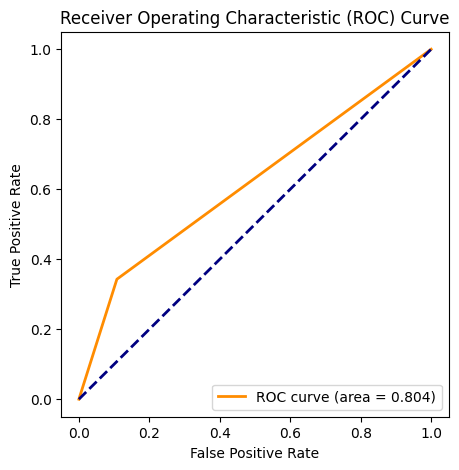

In [ ]:
# Plot ROC Curve for Test data
fpr, tpr, _ = roc_curve(y_test, y_pred_logistic)
plt.figure(figsize=(5, 5))
lw=2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.3f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print("Naive Bayes:")
print(classification_report(y_test, y_pred_nb))

Naive Bayes:
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       102
           1       0.47      0.23      0.31        35

    accuracy                           0.74       137
   macro avg       0.62      0.57      0.57       137
weighted avg       0.70      0.74      0.70       137



In [ ]:
auc_nb = roc_auc_score(y_test, nb_model.predict_proba(X_test)[:, 1])
print('AUC (Naive Bayes): %.3f' % auc_nb)

AUC (Naive Bayes): 0.786


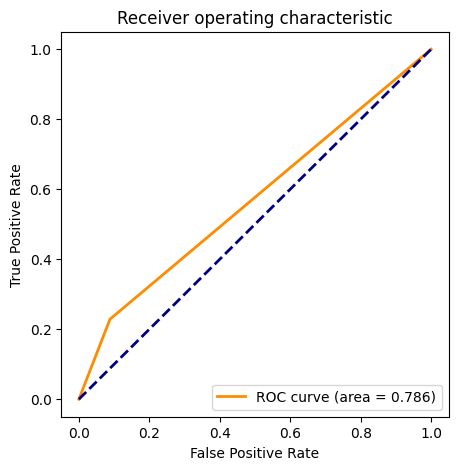

In [ ]:
NBfpr, NBtpr, thresholds = roc_curve(y_test, y_pred_nb)

# plot the roc curve for Test data
plt.figure(figsize=(5, 5))
lw = 2
plt.plot(NBfpr, NBtpr, color='darkorange',lw=lw, label='ROC curve (area = %0.3f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.axis('tight')
plt.xlabel('False Positive Rate');plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# SVM
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("Support Vector Machine:")
print(classification_report(y_test, y_pred_svm))

Support Vector Machine:
              precision    recall  f1-score   support

           0       0.78      0.94      0.85       102
           1       0.57      0.23      0.33        35

    accuracy                           0.76       137
   macro avg       0.68      0.58      0.59       137
weighted avg       0.73      0.76      0.72       137



In [ ]:
# Calculate AUC
auc_svm = roc_auc_score(y_test, svm_model.predict_proba(X_test)[:, 1])
print('AUC (Support Vector Machine): %.3f' % auc_svm)

AUC (Support Vector Machine): 0.720


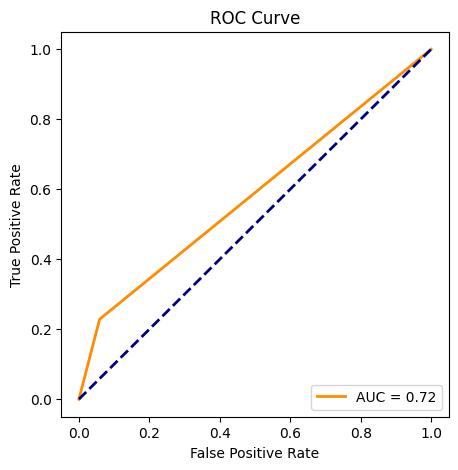

In [ ]:
# Plot ROC curve for test data
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm)
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

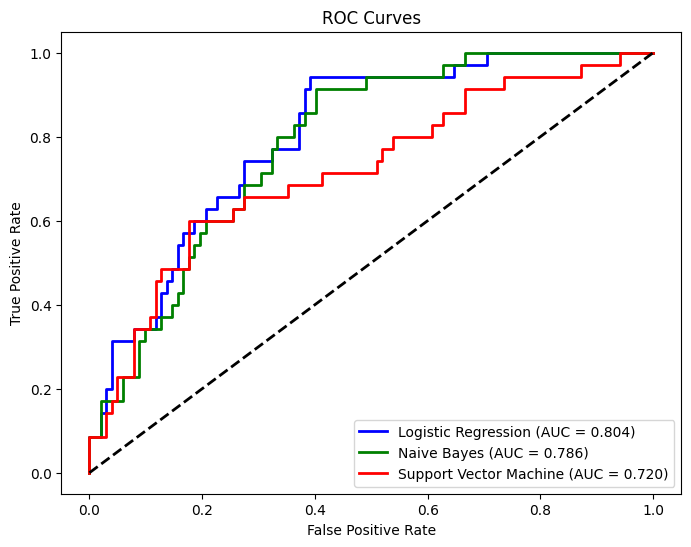

In [ ]:
# Plot ROC Curves
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, color='blue', lw=2, label='Logistic Regression (AUC = %.3f)' % auc_logistic)

fpr, tpr, _ = roc_curve(y_test, nb_model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, color='green', lw=2, label='Naive Bayes (AUC = %.3f)' % auc_nb)

fpr, tpr, _ = roc_curve(y_test, svm_model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, color='red', lw=2, label='Support Vector Machine (AUC = %.3f)' % auc_svm)

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()


Logistic Regression has the highest accuracy at 0.804 and performs relatively better than the other models in terms of recall for class 1.
Naive Bayes has a slightly lower accuracy at 0.786 but performs better in terms of precision for class 1 compared to SVM.
Support Vector Machine has an accuracy of 0.72 but has the highest recall for class 0.
Considering these metrics, Logistic Regression might be the preferred model due to its overall balanced performance and higher accuracy.